# Visualize the cleaned Howell data

## Imports

In [11]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Enable better visuals
sns.set(style="whitegrid")

## Load data

In [12]:
from pathlib import Path
import pandas as pd

data_path = Path(r"C:\Repos\applied-ml-foster\notebooks\example02\Howell_cleaned.csv")

# Correctly read the CSV as comma-separated
howell_df = pd.read_csv(data_path, sep=",")  # use sep="," here

# Check the first few rows
print(howell_df.head())
print(howell_df.columns.tolist())

    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
['height', 'weight', 'age', 'male']


## Height and Weight

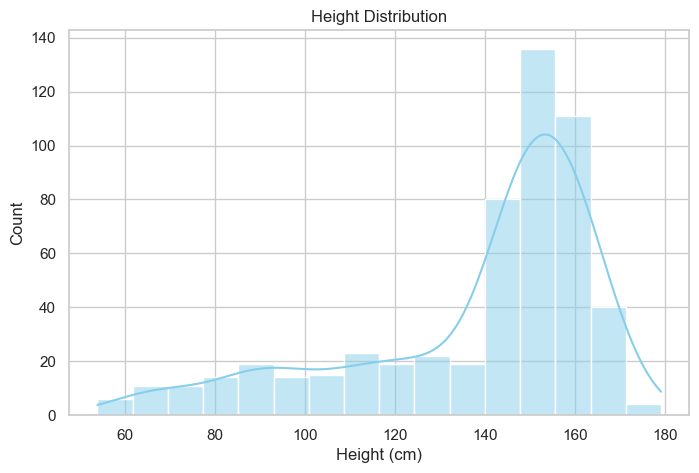

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(howell_df['height'], kde=True, color='skyblue')
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.show()

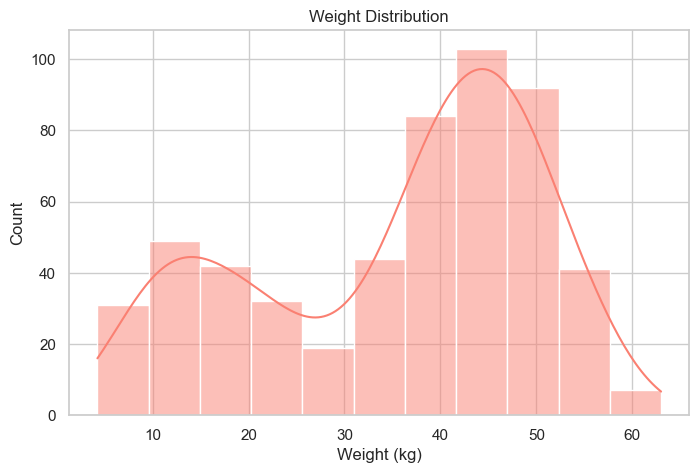

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(howell_df['weight'], kde=True, color='salmon')
plt.title("Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.show()

## Height and weight by gender

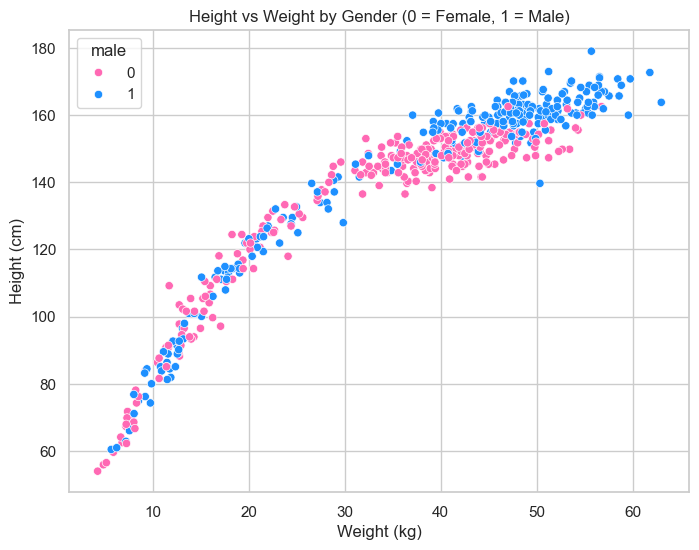

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=howell_df, x="weight", y="height", hue="male", palette=["#ff69b4", "#1e90ff"])
plt.title("Height vs Weight by Gender (0 = Female, 1 = Male)")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.show()

## BMI

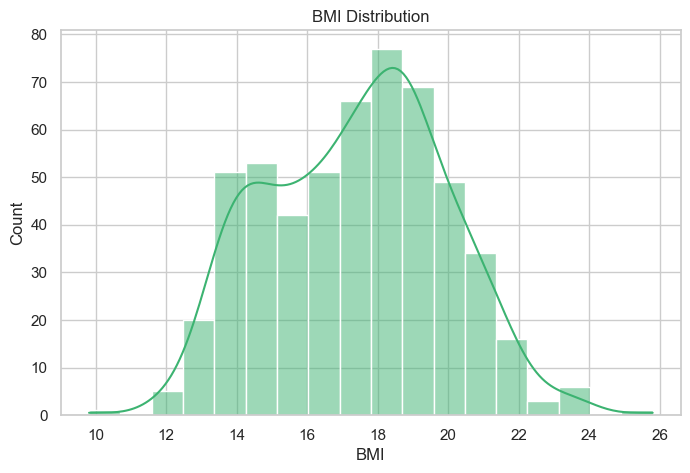

In [16]:
# Calculate BMI
howell_df["BMI"] = howell_df["weight"] / (howell_df["height"] / 100) ** 2

plt.figure(figsize=(8, 5))
sns.histplot(howell_df["BMI"], kde=True, color="mediumseagreen")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [17]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"


howell_df["bmi_category"] = howell_df["BMI"].apply(bmi_category)

# Check counts
howell_df["bmi_category"].value_counts()

bmi_category
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

In [21]:
# ✅ Add BMI category to cleaned data and save

# Define the function for BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"


# Calculate BMI if not already present
howell_df["BMI"] = howell_df["weight"] / (howell_df["height"] / 100) ** 2

# Add the categorical feature
howell_df["bmi_category"] = howell_df["BMI"].apply(bmi_category)

# Save back to the cleaned CSV
howell_df.to_csv(r"C:\Repos\applied-ml-foster\notebooks\example02\Howell_cleaned.csv", index=False)

# Quick check
howell_df.head()

,height,weight,age,male,BMI,bmi_category
0,151.765,47.825606,63.0,1,20.764297,Normal
1,139.700,36.485807,63.0,0,18.695244,Normal
2,136.525,31.864838,65.0,0,17.095718,Underweight
3,156.845,53.041914,41.0,1,21.561444,Normal
4,145.415,41.276872,51.0,0,19.520384,Normal


## Age vs Height (adults)

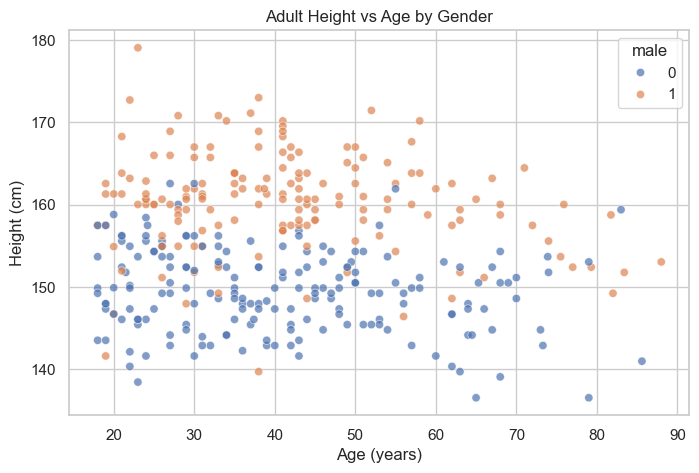

In [22]:
# Filter for adults (age ≥ 18)
howell_adult = howell_df[howell_df["age"] >= 18]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=howell_adult, x="age", y="height", hue="male", alpha=0.7)
plt.title("Adult Height vs Age by Gender")
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.show()

# ✅ Splitting the Data by Age and Plotting with Masking

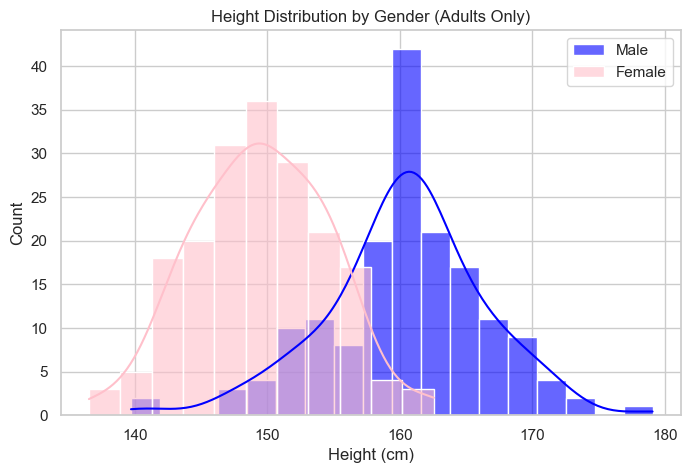

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# Filter for adults (age ≥ 18)
howell_adult = howell_df[howell_df["age"] >= 18]

# Create masks for male and female
male_mask = howell_adult["male"] == 1
female_mask = howell_adult["male"] == 0

# Plot Height Distribution by Gender
plt.figure(figsize=(8, 5))
sns.histplot(x=howell_adult["height"][male_mask], kde=True, color="blue", label="Male", alpha=0.6)
sns.histplot(
    x=howell_adult["height"][female_mask], kde=True, color="pink", label="Female", alpha=0.6
)
plt.title("Height Distribution by Gender (Adults Only)")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.legend()
plt.show()

# ✅ Adult Height and Weight Distributions by Gender

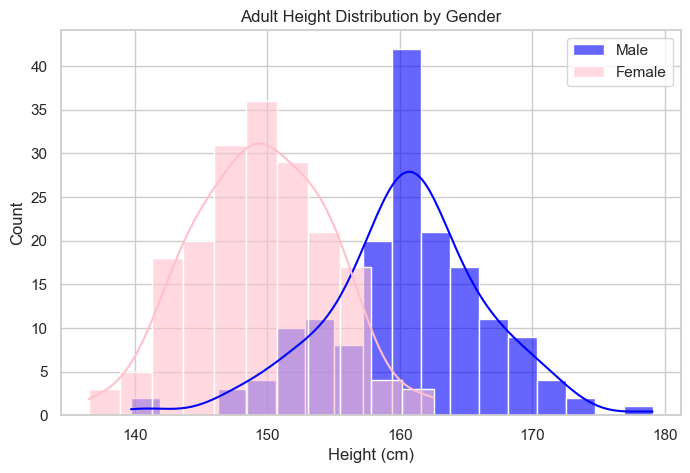

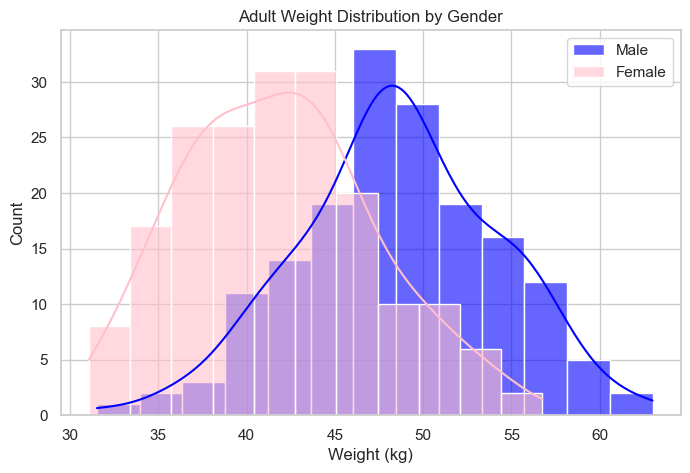

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Filter for adults (age ≥ 18)
howell_adult = howell_df[howell_df["age"] >= 18]

# Create masks for male and female
male_mask = howell_adult["male"] == 1
female_mask = howell_adult["male"] == 0

# --- Height Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(x=howell_adult["height"][male_mask], kde=True, color="blue", label="Male", alpha=0.6)
sns.histplot(
    x=howell_adult["height"][female_mask], kde=True, color="pink", label="Female", alpha=0.6
)
plt.title("Adult Height Distribution by Gender")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.legend()
plt.show()

# --- Weight Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(x=howell_adult["weight"][male_mask], kde=True, color="blue", label="Male", alpha=0.6)
sns.histplot(
    x=howell_adult["weight"][female_mask], kde=True, color="pink", label="Female", alpha=0.6
)
plt.title("Adult Weight Distribution by Gender")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [25]:
# ✅ Stratified Train/Test Split using BMI Category
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned CSV
data_path = Path(r"C:\Repos\applied-ml-foster\notebooks\example02\Howell_cleaned.csv")
howell_df = pd.read_csv(data_path, sep=";")  # change sep="," if your CSV uses commas

# Optional: filter for adults only
howell_adult = howell_df[howell_df["age"] >= 18]

# Features for modeling
X = howell_adult[["height", "weight", "age"]]

# Stratify by BMI category
y = howell_adult["bmi_category"]

# Stratified split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Combine features and target for saving
train_data = X_train.copy()
train_data["bmi_category"] = y_train

test_data = X_test.copy()
test_data["bmi_category"] = y_test

# Save to CSV
train_data.to_csv(r"C:\Repos\applied-ml-foster\notebooks\example02\train_data.csv", index=False)
test_data.to_csv(r"C:\Repos\applied-ml-foster\notebooks\example02\test_data.csv", index=False)

# Quick sanity checks
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)
print("\nTraining distribution:\n", y_train.value_counts())
print("\nTest distribution:\n", y_test.value_counts())

KeyError: 'age'